In [1]:
#导入数据集
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
#机器学习模型
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

In [3]:
#生成训练数据和测试数据
boston = datasets.load_boston()
train = boston.data
target = boston.target

In [4]:
#切割数据样本集合测试集
X_train,x_test,y_train,y_true = train_test_split(train,target,test_size = 0.2)

In [5]:
#可视化
data_df = pd.DataFrame(boston.data,columns=boston.feature_names)
data_df["房价值"] = boston.target
data_df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,房价值
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [11]:
#创建学习模型
knn = KNeighborsRegressor()
linear = LinearRegression()
ridge = Ridge()
lasso = Lasso()
decision = DecisionTreeRegressor()
svr = SVR()

In [12]:
#训练模型
knn.fit(X_train,y_train)
linear.fit(X_train,y_train)
ridge.fit(X_train,y_train)
lasso.fit(X_train,y_train)
decision.fit(X_train,y_train)
svr.fit(X_train,y_train)

d:\python3.5\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [13]:
#预测数据
y_pre_knn = knn.predict(x_test)
y_pre_linear = linear.predict(x_test)
y_pre_ridge = ridge.predict(x_test)
y_pre_lasso = lasso.predict(x_test)
y_pre_decision = decision.predict(x_test)
y_pre_svr = svr.predict(x_test)

In [14]:
#评分
knn_score = r2_score(y_true,y_pre_knn)
linear_score = r2_score(y_true,y_pre_linear)
ridge_score = r2_score(y_true,y_pre_ridge)
lasso_score = r2_score(y_true,y_pre_lasso)
decison_score = r2_score(y_true,y_pre_decision)
svr_score = r2_score(y_true,y_pre_svr)
display(knn_score,linear_score,ridge_score,lasso_score,decison_score,svr_score)

0.27452012201630516

0.46962430409536515

0.4639912677338801

0.42658869981617786

0.6661175506790065

0.03613346221031688

In [15]:
#SVR核函数优化
svr = SVR(kernel ='linear')
svr.fit(X_train,y_train)
y_pre_svr = svr.predict(x_test)
r2_score(y_true,y_pre_svr)

0.5078593889239023

In [16]:
from sklearn.linear_model import BayesianRidge  #贝叶斯岭回归
baridge = BayesianRidge()
baridge.fit(X_train,y_train)
y_pre_baridge = baridge.predict(x_test)
baridge_score = r2_score(y_true,y_pre_baridge)
baridge_score

0.45931734503691146

In [17]:
from sklearn.linear_model import ElasticNet  #弹性网络回归
elasticnet = ElasticNet()
elasticnet.fit(X_train,y_train)
y_pre_elasticnet = elasticnet.predict(x_test)
elasticnet_score = r2_score(y_true,y_pre_elasticnet)
elasticnet_score

0.4349881652437263

In [18]:
from sklearn.ensemble.gradient_boosting import GradientBoostingRegressor #梯度增强回归
gradient = GradientBoostingRegressor()
gradient.fit(X_train,y_train)
y_pre_gradient = gradient.predict(x_test)
gradient_score = r2_score(y_true,y_pre_gradient)
gradient_score

0.7680512350268345

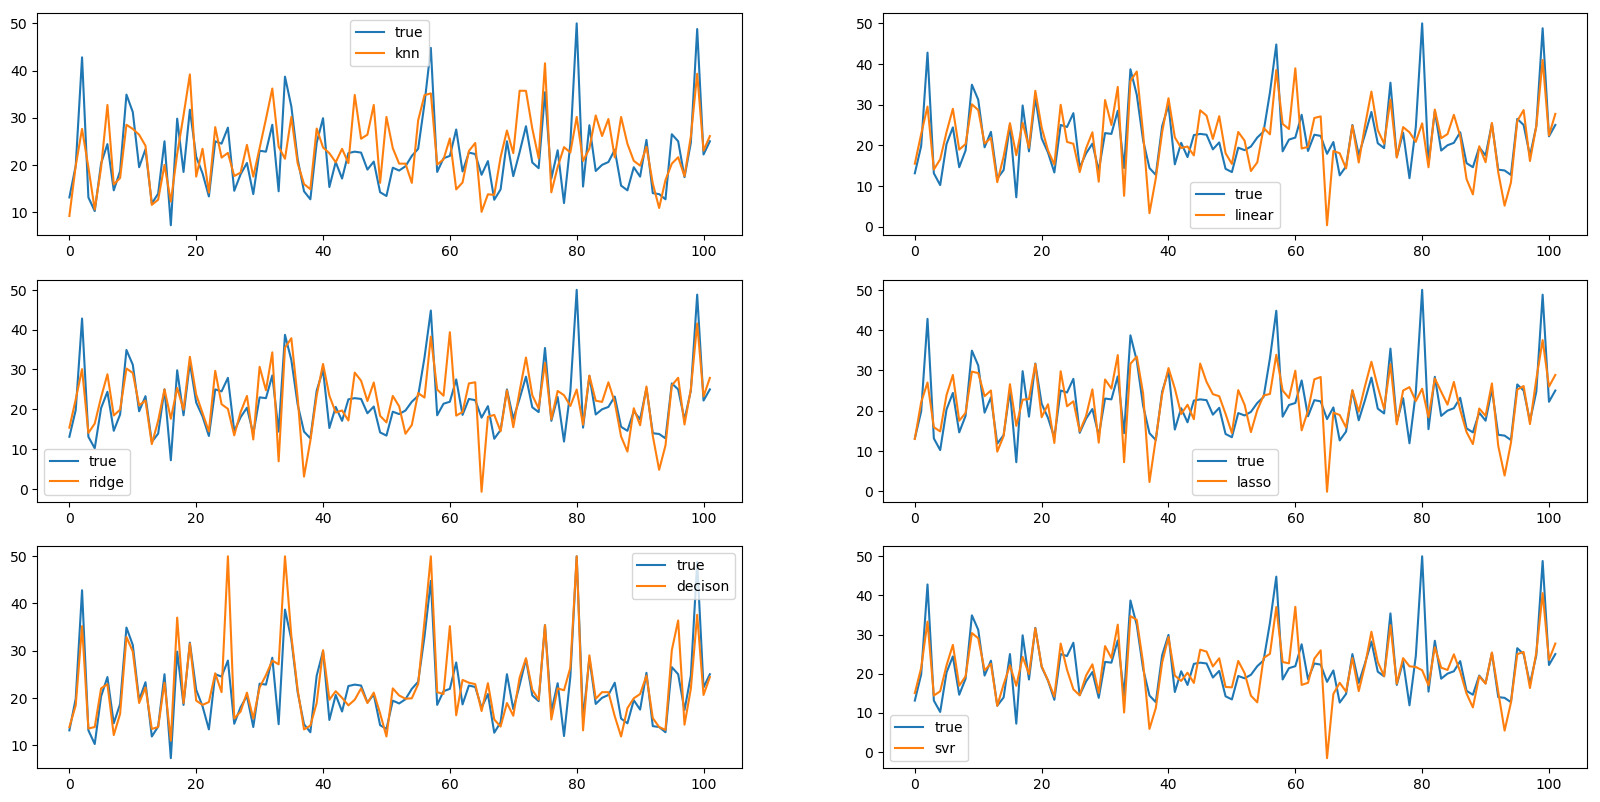

In [19]:
#绘图
plt.figure(figsize=[20,10],dpi =100)
#KNN
plt.subplot(321)
plt.plot(y_true,label='true')
plt.plot(y_pre_knn,label='knn')
plt.legend(loc="upper right")
plt.legend()

#Linear
plt.subplot(322)
plt.plot(y_true,label='true')
plt.plot(y_pre_linear,label='linear')
plt.legend()

#Ridge
plt.subplot(323)
plt.plot(y_true,label='true')
plt.plot(y_pre_ridge,label='ridge')
plt.legend()

#Lasso
plt.subplot(324)
plt.plot(y_true,label='true')
plt.plot(y_pre_lasso,label='lasso')
plt.legend()

#decision
plt.subplot(325)
plt.plot(y_true,label='true')
plt.plot(y_pre_decision,label='decison')
plt.legend()

#SVR
plt.subplot(326)
plt.plot(y_true,label='true')
plt.plot(y_pre_svr,label='svr')
plt.legend()

In [1]:
#！-*-coding:utf-8-*-

In [20]:
#导入模块
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split

In [21]:
#读取数据
data = pd.read_csv('E:\do you learn\decision.csv',encoding='utf-8',sep=' ')

In [22]:
#数据探索
data.shape

(1000000, 16)

In [23]:
data.head(5)

,user_id,age,net_age,neto_dur,chrg_dur,sms_bill_cnt,flux_fee,iset_flux,arpu,acct_balance,extend_paydate_days,last_year_owe_cnt,last_year_complain_cnt,ordered_prodect_cnt,circle_nou,churn_label
0,8408056510,31,25,42,42,16,2717,10240,21383,4162,30,0,0,3,4,0
1,8627971378,37,23,97,42,21,2382,1024,7847,5884,47,5,0,1,4,0
2,8707700881,35,20,73,27,4,2152,300,1941,3358,40,0,0,4,2,1
3,8404003205,42,15,97,27,21,2024,200,2656,2487,70,0,0,1,6,0
4,8701397825,39,21,71,8,15,2336,10240,9954,3052,70,3,3,2,6,0


In [25]:
data.corr()

,user_id,age,net_age,neto_dur,chrg_dur,sms_bill_cnt,flux_fee,iset_flux,arpu,acct_balance,extend_paydate_days,last_year_owe_cnt,last_year_complain_cnt,ordered_prodect_cnt,circle_nou,churn_label
user_id,1.000000,0.001488,0.000384,-0.001375,-0.000474,-0.001821,0.000388,-0.000595,-0.000471,0.000050,-0.001267,0.000480,0.000350,0.000789,0.000074,-0.000852
age,0.001488,1.000000,0.000061,0.000224,-0.001402,0.001003,-0.001047,0.000473,-0.000688,-0.000182,0.001592,-0.000766,-0.000050,-0.000905,-0.000256,-0.000213
net_age,0.000384,0.000061,1.000000,-0.000002,0.002897,0.001565,-0.001314,0.001667,0.001247,-0.000657,0.001817,0.000936,-0.000474,-0.000472,-0.003150,-0.000696
neto_dur,-0.001375,0.000224,-0.000002,1.000000,0.001004,0.000752,0.000338,0.000533,0.000468,0.001857,-0.000279,-0.003037,0.001473,-0.001086,-0.000478,-0.000192
chrg_dur,-0.000474,-0.001402,0.002897,0.001004,1.000000,0.000448,0.000527,-0.000566,0.000234,-0.000122,0.001777,0.000739,-0.000992,0.002273,0.001246,0.000860
sms_bill_cnt,-0.001821,0.001003,0.001565,0.000752,0.000448,1.000000,0.000684,-0.000830,-0.000120,0.000006,-0.000864,-0.000908,0.000091,0.000706,-0.000260,-0.000276
flux_fee,0.000388,-0.001047,-0.001314,0.000338,0.000527,0.000684,1.000000,0.000466,0.001588,-0.000628,0.001599,-0.001111,0.000694,-0.000040,0.000455,-0.089097
iset_flux,-0.000595,0.000473,0.001667,0.000533,-0.000566,-0.000830,0.000466,1.000000,0.828962,0.000584,-0.000739,-0.000166,-0.001138,0.000169,0.001039,-0.000929
arpu,-0.000471,-0.000688,0.001247,0.000468,0.000234,-0.000120,0.001588,0.828962,1.000000,0.000141,-0.001517,-0.000497,-0.001357,0.000206,0.001179,-0.000535
acct_balance,0.000050,-0.000182,-0.000657,0.001857,-0.000122,0.000006,-0.000628,0.000584,0.000141,1.000000,0.001260,0.001061,0.000570,-0.001703,-0.002059,-0.000275


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 16 columns):
user_id                   1000000 non-null int64
age                       1000000 non-null int64
net_age                   1000000 non-null int64
neto_dur                  1000000 non-null int64
chrg_dur                  1000000 non-null int64
sms_bill_cnt              1000000 non-null int64
flux_fee                  1000000 non-null int64
iset_flux                 1000000 non-null int64
arpu                      1000000 non-null int64
acct_balance              1000000 non-null int64
extend_paydate_days       1000000 non-null int64
last_year_owe_cnt         1000000 non-null int64
last_year_complain_cnt    1000000 non-null int64
ordered_prodect_cnt       1000000 non-null int64
circle_nou                1000000 non-null int64
churn_label               1000000 non-null int64
dtypes: int64(16)
memory usage: 122.1 MB


In [24]:
data.describe()

,user_id,age,net_age,neto_dur,chrg_dur,sms_bill_cnt,flux_fee,iset_flux,arpu,acct_balance,extend_paydate_days,last_year_owe_cnt,last_year_complain_cnt,ordered_prodect_cnt,circle_nou,churn_label
count,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,8.499994e+09,35.027698,30.326975,59.574035,29.548803,15.079246,2000.137351,2787.907616,7724.929542,4109.592104,39.953382,0.656272,0.655834,3.501180,3.884833,0.500786
std,2.887864e+08,11.340514,14.144417,19.880181,9.943020,7.429960,598.237676,3094.369936,5907.102323,1881.612053,23.379563,1.313058,1.312611,1.707307,1.949743,0.500000
min,8.000001e+09,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,200.000000,-12655.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,8.249915e+09,26.000000,20.000000,46.000000,23.000000,10.000000,1596.000000,500.000000,3198.000000,2758.000000,20.000000,0.000000,0.000000,2.000000,2.000000,0.000000
50%,8.499927e+09,34.000000,30.000000,60.000000,30.000000,15.000000,2000.000000,1536.000000,5915.000000,4055.000000,40.000000,0.000000,0.000000,4.000000,4.000000,1.000000
75%,8.750455e+09,42.000000,40.000000,73.000000,36.000000,20.000000,2404.000000,4096.000000,10643.000000,5383.000000,60.000000,1.000000,0.000000,5.000000,5.000000,1.000000
max,9.000000e+09,101.000000,107.000000,158.000000,77.000000,55.000000,4897.000000,10240.000000,48431.000000,14183.000000,80.000000,5.000000,5.000000,6.000000,7.000000,1.000000


In [24]:
#数据构造
col_dicts = {}
cols = data.columns.values.tolist()
df = data.loc[:,cols[1:]]
print(df.shape)

(1000000, 15)


In [25]:
X = df.loc[:,cols[1:-1]]
print(X.info())
y = df[cols[-1]]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 14 columns):
age                       1000000 non-null int64
net_age                   1000000 non-null int64
neto_dur                  1000000 non-null int64
chrg_dur                  1000000 non-null int64
sms_bill_cnt              1000000 non-null int64
flux_fee                  1000000 non-null int64
iset_flux                 1000000 non-null int64
arpu                      1000000 non-null int64
acct_balance              1000000 non-null int64
extend_paydate_days       1000000 non-null int64
last_year_owe_cnt         1000000 non-null int64
last_year_complain_cnt    1000000 non-null int64
ordered_prodect_cnt       1000000 non-null int64
circle_nou                1000000 non-null int64
dtypes: int64(14)
memory usage: 106.8 MB
None


In [26]:
#数据拆分
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.43,random_state=110)

In [28]:
y_train.value_counts()/len(y_train)

1    0.501532
0    0.498468
Name: churn_label, dtype: float64

In [29]:
y_test.value_counts()/len(y_test)

0    0.500202
1    0.499798
Name: churn_label, dtype: float64

In [30]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [31]:
#构建随机森林模型
i = 10
while i <= 15:
    credit_model = RandomForestClassifier(n_estimators = i,max_features = 'log2',max_depth=2,min_samples_split =4)
    credit_model.fit(X_train,y_train)
    credit_pred = credit_model.predict(X_test)
    print(metrics.accuracy_score(y_test,credit_pred))
    i=i+1

0.5561813953488373
0.5560558139534884
0.5561558139534883
0.5561883720930233
0.556146511627907
0.5560186046511628


In [32]:
max_feature_params = ['auto', 'sqrt', 'log2', .01, .5, .99]
for max_feature in max_feature_params:
    credit_model = RandomForestClassifier(n_estimators = 14,max_features = max_feature ,max_depth=2,min_samples_split =3)
    credit_model.fit(X_train,y_train)
    credit_pred = credit_model.predict(X_test)
    print(metrics.accuracy_score(y_test,credit_pred))

0.5561023255813954
0.5561279069767442
0.5559674418604651
0.5560441860465116
0.5561558139534883
0.5561674418604651


In [33]:
#模型预测及结果分析
credit_pred = credit_model.predict(X_test)

In [35]:
print(metrics.classification_report(y_test,credit_pred))

              precision    recall  f1-score   support

           0       0.56      0.56      0.56    215087
           1       0.56      0.56      0.56    214913

   micro avg       0.56      0.56      0.56    430000
   macro avg       0.56      0.56      0.56    430000
weighted avg       0.56      0.56      0.56    430000



In [36]:
print(metrics.confusion_matrix(y_test,credit_pred))

[[119836  95251]
 [ 95597 119316]]


In [37]:
print(metrics.accuracy_score(y_test,credit_pred))

0.5561674418604651


### 第二次课

### 第1章聚类与降维原理与实践

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt 
%matplotlib inline

In [43]:
X = pd.read_csv('E:/do you learn/MLdata/telecom.csv',encoding='utf-8')
X.shape

(30000, 7)

In [44]:
X.head()

,入网时间,套餐价格,每月流量,每月话费,每月通话时长,欠费金额,欠费月份数
0,27.0,389.0,140.198242,390.0,14.325000,0.0,0.0
1,29.0,159.0,0.000000,5.0,0.000000,5.0,1.0
2,28.0,389.0,0.000000,0.0,0.000000,0.0,0.0
3,20.0,389.0,0.000000,0.0,57.097222,0.0,0.0
4,59.0,159.0,0.000000,4.0,0.000000,0.0,0.0


In [45]:
#数据标准化
from sklearn import preprocessing
X_scaled = preprocessing.scale(X)
X_scaled[0:5]

array([[-0.32484896,  1.63037135, -0.14052452,  2.08138717, -0.5953273 ,
        -0.2199407 , -0.31623138],
       [-0.24388972, -0.29646995, -0.46276181, -0.68654465, -0.62960238,
        -0.18990475,  0.39196072],
       [-0.28436934,  1.63037135, -0.46276181, -0.72249182, -0.62960238,
        -0.2199407 , -0.31623138],
       [-0.6082063 ,  1.63037135, -0.46276181, -0.72249182, -0.49298724,
        -0.2199407 , -0.31623138],
       [ 0.97049891, -0.29646995, -0.46276181, -0.69373409, -0.62960238,
        -0.2199407 , -0.31623138]])

In [46]:
#进行PCA数据降维
from sklearn.decomposition import PCA

#生成PCA实例
pca = PCA(n_components = 3)
#进行PCA降维
X_pca = pca.fit_transform(X_scaled)
#生成降维后的dataframe
X_pca_frame = pd.DataFrame(X_pca,columns=['pca_1','pca_2','pca_3'])
X_pca_frame.head()

,pca_1,pca_2,pca_3
0,1.549988,-0.211833,-1.038576
1,-1.034264,0.257341,-0.385973
2,-0.244564,-0.431907,-1.222455
3,-0.151285,-0.400462,-1.430211
4,-1.163608,-0.439145,0.526530


#### K-means聚类模型训练

In [47]:
#1、训练简单模型
from sklearn.cluster import KMeans
#Kmeans算法实例化，将其设置为K=10
est = KMeans(n_clusters = 10)

#作用到降维后的数据上
est.fit(X_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [48]:
#取出聚类后的标签
kmeans_clustering_labels = pd.DataFrame(est.labels_,columns=['cluster'])

In [49]:
#生成有聚类后的dataframe
X_pca_frame = pd.concat([X_pca_frame,kmeans_clustering_labels],axis=1)
X_pca_frame.head()

,pca_1,pca_2,pca_3,cluster
0,1.549988,-0.211833,-1.038576,2
1,-1.034264,0.257341,-0.385973,9
2,-0.244564,-0.431907,-1.222455,8
3,-0.151285,-0.400462,-1.430211,8
4,-1.163608,-0.439145,0.526530,1


In [50]:
#2、对不同的k值进行计算，筛选最优的k值
from mpl_toolkits.mplot3d import Axes3D
from sklearn import metrics

calinski_harabaz_score with k=2 is 8911.262586362569
calinski_harabaz_score with k=3 is 5996.585231373978
calinski_harabaz_score with k=4 is 5444.789339995326
calinski_harabaz_score with k=5 is 5140.702252117128
calinski_harabaz_score with k=6 is 3803.9807615664945
calinski_harabaz_score with k=7 is 10832.277714083617
calinski_harabaz_score with k=8 is 9360.781433364591
calinski_harabaz_score with k=9 is 5881.7954590156105
calinski_harabaz_score with k=10 is 5234.66024154821
calinski_harabaz_score with k=11 is 6173.94349963623
calinski_harabaz_score with k=12 is 20972.98238123612
calinski_harabaz_score with k=13 is 19250.67642290006


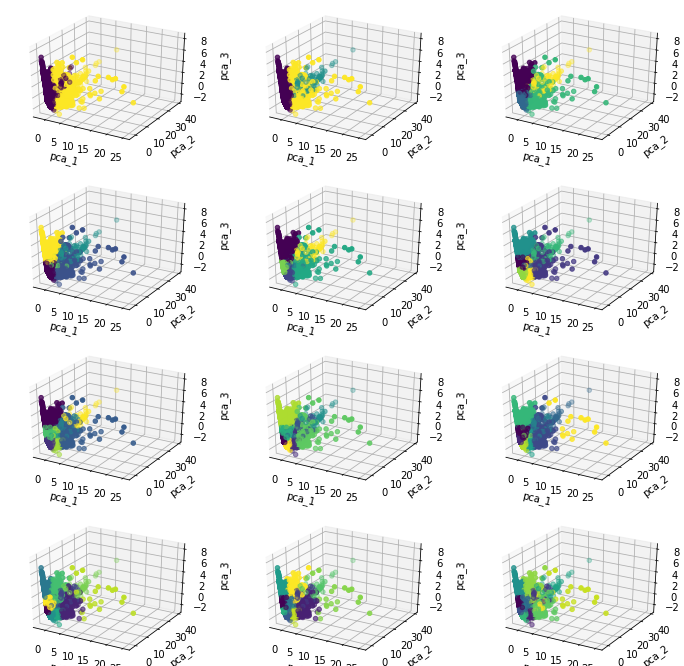

In [51]:
#KMeans 算法实例化，将其设置为K = range(2,14)
d ={}
fig_reduced_data = plt.figure(figsize = (12,12))
for k in range(2,14):
    est = KMeans(n_clusters=k,random_state=111)
    #作用到降维后的数据上
    y_pred = est.fit_predict(X_pca)
    #评估不同K值聚类算法效果
    calinski_harabaz_score = metrics.calinski_harabaz_score(X_pca_frame,y_pred)
    d.update({k:calinski_harabaz_score})
    print('calinski_harabaz_score with k={0} is {1}'.format(k,calinski_harabaz_score))
    ax =  plt.subplot(4,3,k-1,projection = '3d')
    ax.scatter(X_pca_frame.pca_1,X_pca_frame.pca_2,X_pca_frame.pca_3,c = y_pred)
    ax.set_xlabel('pca_1')
    ax.set_ylabel('pca_2')
    ax.set_zlabel('pca_3')    

Text(0, 0.5, 'calinski_harabaz_score')

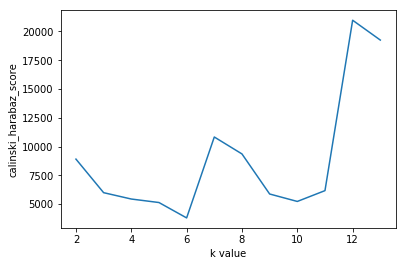

In [52]:
#3.绘制不同k值对应的score ,找到最优的k值
x = []
y = []
for k ,score in d.items():
    x.append(k)
    y.append(score)

plt.plot(x,y)
plt.xlabel('k value')
plt.ylabel('calinski_harabaz_score')

#### 样本筛选

In [53]:
#1.去除异常数据样本
X.index = X_pca_frame.index
#合并原数据和三个主成分的数据
X_full = pd.concat([X,X_pca_frame],axis =1)
X_full.head()

,入网时间,套餐价格,每月流量,每月话费,每月通话时长,欠费金额,欠费月份数,pca_1,pca_2,pca_3,cluster
0,27.0,389.0,140.198242,390.0,14.325000,0.0,0.0,1.549988,-0.211833,-1.038576,2
1,29.0,159.0,0.000000,5.0,0.000000,5.0,1.0,-1.034264,0.257341,-0.385973,9
2,28.0,389.0,0.000000,0.0,0.000000,0.0,0.0,-0.244564,-0.431907,-1.222455,8
3,20.0,389.0,0.000000,0.0,57.097222,0.0,0.0,-0.151285,-0.400462,-1.430211,8
4,59.0,159.0,0.000000,4.0,0.000000,0.0,0.0,-1.163608,-0.439145,0.526530,1


In [54]:
#按每个聚类分组
grouped = X_full.groupby('cluster')
result_data = pd.DataFrame()
#对分组做循环，分别对每组进行去除异常值处理
for name ,group in grouped:
    #每组去除异常值前的个数
    print('Group:{},Samples before:{}'.format(name,group['pca_1'].count()))
    desp = group[['pca_1','pca_2','pca_3']].describe()
    for att in ['pca_1','pca_2','pca_3']:
        lower25 = desp.loc['25%',att]
        upper75 = desp.loc['75%',att]      
        IQR =upper75 - lower25
        min_value = lower25 - 1.5*IQR
        max_value = upper75 + 1.5*IQR
        #使用统计中的1.5*IQR法则，删除每个聚类中的噪音和异常点
        group = group[(group[att]>min_value)&(group[att]<max_value)]
    result_data = pd.concat([result_data,group],axis = 0)
    #每组去除异常值钱的个数
    print('Group:{},Samples after:{}'.format(name, group['pca_1'].count()))
print('Remain sample:',result_data['pca_1'].count())

Group:0,Samples before:1592
Group:0,Samples after:1128
Group:1,Samples before:6691
Group:1,Samples after:6014
Group:2,Samples before:2919
Group:2,Samples after:2314
Group:3,Samples before:1931
Group:3,Samples after:1594
Group:4,Samples before:47
Group:4,Samples after:30
Group:5,Samples before:369
Group:5,Samples after:297
Group:6,Samples before:1194
Group:6,Samples after:1084
Group:7,Samples before:2622
Group:7,Samples after:2238
Group:8,Samples before:3460
Group:8,Samples after:2758
Group:9,Samples before:9175
Group:9,Samples after:7842
Remain sample: 25299


Text(0.5, 0, 'Component_3')

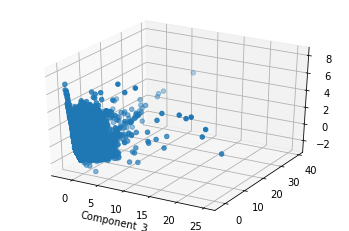

In [55]:
#2.原始数据降维后的可视化
from mpl_toolkits.mplot3d import Axes3D

#生成三维图形，每个样本点的坐标分别是三个主成分的值
fig_reduced_data = plt.figure()
ax_reduced_data = plt.subplot(111,projection = '3d')
ax_reduced_data.scatter(X_pca_frame.pca_1.values,X_pca_frame.pca_2.values,X_pca_frame.pca_3.values)
ax_reduced_data.set_xlabel('Component_1')
ax_reduced_data.set_xlabel('Component_2')
ax_reduced_data.set_xlabel('Component_3')

Text(0.5, 0, 'Component_3')

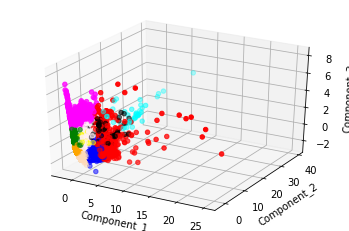

In [56]:
#3.聚类算法之后的不同簇数据的可视化
cluster_2_color = {0:'red',1:'green',2:'blue',3:'yellow',4:'cyan',
                   5:'black',6:'magenta',7:'#fff0f5',8:'#ffdab9',9:'#ffa500'}

colors_clustered_data = X_pca_frame.cluster.map(cluster_2_color)
fig_clustered_data = plt.figure()
ax_clustered_data = plt.subplot(111,projection = '3d')

#聚类算法之后的不同簇数据的映射为不同颜色
ax_clustered_data.scatter(X_pca_frame.pca_1.values,X_pca_frame.pca_2.values,X_pca_frame.pca_3.values,c=colors_clustered_data)
ax_clustered_data.set_xlabel('Component_1')
ax_clustered_data.set_ylabel('Component_2')
ax_clustered_data.set_zlabel('Component_3')

Text(0.5, 0, 'Component_3')

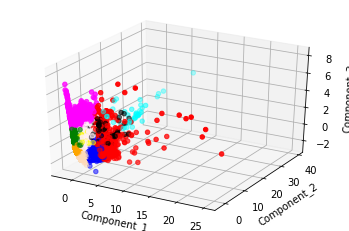

In [57]:
#4.筛选后的数据聚类可视化
colors_filtered_data = result_data.cluster.map(cluster_2_color)
fig = plt.figure()
ax = plt.subplot(111,projection = '3d')
ax.scatter(X_pca_frame.pca_1.values,X_pca_frame.pca_2.values,
           X_pca_frame.pca_3.values,c=colors_clustered_data)
ax.set_xlabel('Component_1')
ax.set_ylabel('Component_2')
ax.set_zlabel('Component_3')

#### 1.3.6用户分析

In [60]:
#1.查看各族中的每月花费情况
monthly_Fare = result_data.groupby('cluster').describe().loc[:,u'每月话费']
monthly_Fare                                                             

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,1128.0,399.348837,48.427756,10.948333,391.093750,398.608333,411.985417,620.083333
1,6014.0,38.628822,38.365406,0.000000,4.000000,23.039167,70.025000,218.480000
2,2314.0,341.406312,116.011598,0.000000,375.437500,390.000000,394.000000,589.000000
3,1594.0,79.353881,21.662634,0.000000,60.000000,89.000000,90.000000,240.000000
4,30.0,403.396111,35.766471,389.000000,389.000000,391.000000,394.750000,532.000000
5,297.0,101.299590,42.357029,40.000000,89.000000,89.000000,129.000000,406.333333
6,1084.0,54.362685,71.138197,0.000000,4.000000,11.885833,93.994167,346.796667
7,2238.0,119.181613,69.458118,0.000000,73.194583,114.079167,155.342083,534.320000
8,2758.0,2.937704,16.510329,0.000000,0.000000,0.000000,0.000000,200.045000


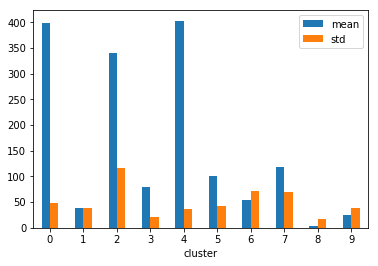

In [61]:
monthly_Fare[['mean','std']].plot(kind = 'bar',rot=0, legend = True)

In [34]:
#2.查看各族中的入网时间
access_time = result_data.groupby('cluster').describe().loc[:,u'入网时间']
access_time

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,9449.0,28.205630,11.798493,12.0,17.00,26.0,39.0,57.0
1,1508.0,25.563660,8.760050,12.0,20.00,27.0,28.0,93.0
2,1606.0,27.228518,8.898848,12.0,21.00,25.0,38.0,72.0
3,30.0,25.433333,14.163292,12.0,17.25,20.5,27.0,65.0
4,1259.0,118.240667,29.338007,29.0,102.00,122.0,135.0,193.0
5,297.0,22.468013,7.817156,12.0,16.00,22.0,23.0,60.0
6,2808.0,18.830484,5.484093,12.0,15.00,16.0,25.0,42.0
7,5919.0,48.446697,16.024709,12.0,39.00,49.0,60.0,102.0
8,2213.0,24.475373,7.717723,12.0,20.00,25.0,28.0,81.0


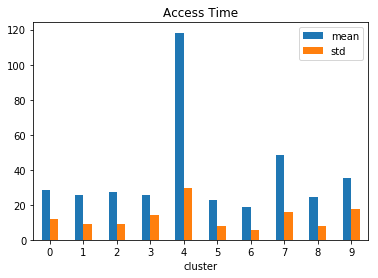

In [36]:
access_time[['mean','std']].plot(kind = 'bar',rot=0, legend = True,title='Access Time')

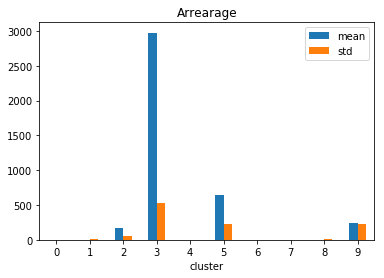

In [39]:
#查看各族中的欠费金额情况
arrearage = result_data.groupby('cluster').describe().loc[:,u'欠费金额']
arrearage[['mean','std']].plot(kind = 'bar',rot=0, legend = True,title = 'Arrearage')

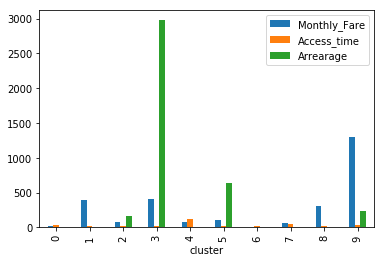

In [41]:
#综合描述
new_column = ['Access_time',u'套餐价格',u'每月流量','Monthly_Fare',u'每月通话时长','Arrearage',u'欠费月份数'
              ,u'pca_1',u'pca_2',u'pca_3',u'cluster']
result_data.columns =new_column
result_data.groupby('cluster')[['Monthly_Fare','Access_time','Arrearage']].mean().plot(kind = 'bar')

### 第2章 关联规则原理与实践

In [2]:
import csv
import itertools
import pyfpgrowth as fp  #导入fpgrowth
import matplotlib as plt

In [47]:
#! pip list  #安装包快捷

In [48]:
#初始化数据，依据地址信息对读取数据预处理，拼装成制定地区的套餐数据列表
def initData(destId):
    destDatalist = [] #定义制定地区的目标数据列表，存储套餐数据
    with open("E:/do you learn/MLdata/Correlation.CSV","r") as csv_file:
        csv_file1 = csv.reader(csv_file)
        for i ,rows in enumerate(csv_file1):
            if 0 <i:
                rowValue = rows[0].spilt("")
                if int(rowValue[1])==destId:
                    if len(rowValue)>2:
                        rowValue.remove(rowValue[0])
                        rowValue.remove(rowValue[0])  
                        destDatalist.append(rowValue)
                else:
                    continue
    return destDatalist

In [49]:
#获取类别数
def getlenRuleKinds(sortRuleslist):
    kindsdict = {}
    if isinstance(sortRuleslist,dict):
        for rule in sortRuleslist.items():
            rulekey=rule[0]
            rulekeyitemlen = len(rulekey)+1
            
            if rulekeyitemlen in kindsdict:
                kindscount = kindsdict.get(rulekeyitemlen)
                kindsdict[rulekeyitemlen] = int(kindscount) +1 
                
            else:
                kindsdict[rulekeyitemlen] = 1
        
    elif isinstance(sortRuleslist,list):
        #print(sortRuleslist)
        for rule in sortRuleslist:
            #print(rule)
            rulekey = rule[0]
            rulekeyitem = len(rulekey) + 1
            if rulekeyitem in kindsdict:
                kindscount = kindsdict.get(rulekeyitemlen)
                kindsdict[rulekeyitem] = int(kindscount) + 1
            else:
                kindsdict[rulekeyitem] = 1
        kindlist = sorted(kindsdict.items(),key = lambda item :item[0],reverse = True)
        for item in kindlist:
            if item[0] >2:
                kindsdict[item[0]-1] = item[0] * kindsdict[item[0]] + kindsdict[item[0]-1]

        return kindsdict

In [4]:
#计算关联规则
#获取指定套餐个数的套餐类别
def getlenRules(sortRuleslist, rulelen):
    ruledict = {}
    #print(sortRuleslist)
    if isinstance(sortRuleslist, dict):
        #print(sortRuleslist.items())
        for rule in sortRuleslist.items():
            rulekey = rule[0]
            rulevalue = rule[1]
            #print(rulekey)
            if (len(rulekey)+1 >= rulelen):
                rulecell = rulekey + rulevalue[0]
                #遍历所有指定长度的组合类型
                for antecedent in itertools.combinations(list(rulecell), rulelen):
                    if antecedent in ruledict:#如果字典中的包含该规则
                        ruleItem_conf_new = rulevalue[1]
                        ruleItem_conf_old = ruledict[antecedent]
                        if isinstance(ruleItem_conf_old, tuple): #如果字典中的规则是否为元组
                            if ruleItem_conf_old[0] == ruleItem_conf_new[0]:
                                ruleItem_conf_new[1] = max(float(ruleItem_conf_new[1]),float(ruleItem_conf_old[1]))
                                ruledict[antecedent] = tuple(ruleItem_conf_new[0], ruleItem_conf_new[1])
                            else:
                                ruleItem_conf_value = float(ruleItem_conf_new[1] + float(ruleItem_conf_old[1]))
                                ruledict[antecedent] = ruleItem_conf_value
                            else: 
                                ruleItem_conf_value = max(float(ruleItem_conf_new),ruleItem_conf_old)
                                ruledict(antecedent) = ruleItem_conf_value
                            else:
                                ruleItem_conf_new = rulevalue[1]
                                ruledict[antecedent] = ruleItem_conf_new
                        else:
                            continue
                            
                        if len(ruledict) == 0:
                            print("不存在包含%d项集频繁项"% rulelen)
                            return None
                        else:
                            return sorted(ruledict.items(), key=lambda x:x[1], reverse=True)
                        elif isinstance(sortRuleslist, list):
                            for rule in sortRuleslist:
                                rulekey = rule[0]
                                rulevalue = rule[1]
                                if (len(rulekey) + 1 >= rulelen):
                                    rulecell = rulekey + rulevalue[0]                                             

SyntaxError: invalid syntax (<ipython-input-4-8d29440425ad>, line 26)

### 第3章 推荐算法原理与实战

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

from lightfm.datasets import fetch_movielens
from lightfm import LightFM
%matplotlib inline

d:\python3.5\lib\site-packages\lightfm\_lightfm_fast.py:9: UserWarning: LightFM was compiled without OpenMP support. Only a single thread will be used.
  warnings.warn('LightFM was compiled without OpenMP support. '


In [63]:
#1、获取评分4分以上的数据
data = fetch_movielens(min_rating = 4.0)

In [64]:
type(data)

dict

In [66]:
#2、显示数据信息
for key, value in data.items():
    print(key, type(value), value.shape)

item_feature_labels <class 'numpy.ndarray'> (1682,)
item_labels <class 'numpy.ndarray'> (1682,)
train <class 'scipy.sparse.coo.coo_matrix'> (943, 1682)
test <class 'scipy.sparse.coo.coo_matrix'> (943, 1682)
item_features <class 'scipy.sparse.csr.csr_matrix'> (1682, 1682)


In [67]:
#3.显示test数据的100列
data['test'].todense()[:1,:100]

matrix([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [68]:
#4.显示电影的标签名称
print(data["item_labels"])

['Toy Story (1995)' 'GoldenEye (1995)' 'Four Rooms (1995)' ...
 'Sliding Doors (1998)' 'You So Crazy (1994)'
 'Scream of Stone (Schrei aus Stein) (1991)']


In [69]:
#1、转换数据格式
train_df = pd.DataFrame(data['train'].todense(),columns = data['item_labels'])
train_df = train_df.transpose()
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,933,934,935,936,937,938,939,940,941,942
Toy Story (1995),5,4,0,0,0,4,0,0,0,4,...,0,0,4,0,4,0,0,5,0,0
GoldenEye (1995),0,0,0,0,0,0,0,0,0,0,...,4,0,0,0,0,0,0,0,0,5
Four Rooms (1995),4,0,0,0,0,0,0,0,0,0,...,0,0,4,0,0,0,0,0,0,0
Get Shorty (1995),0,0,0,0,0,0,5,0,0,4,...,5,0,0,0,0,0,0,0,0,0
Copycat (1995),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Text(0.5, 0, 'count of item')

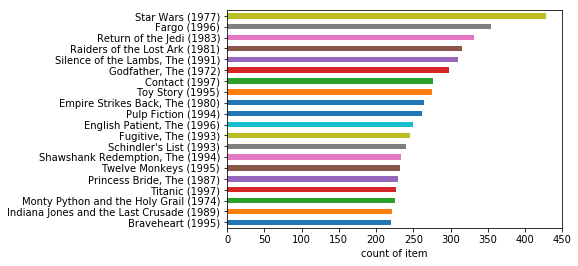

In [70]:
#2、显示评分最多的电影
def count_label(x):
    if x >0 :
        return True
    else:
        return False
    
item_count = train_df.applymap(count_label).sum(axis =1)
item_count.sort_values(ascending = False)[0:20][::-1].plot.barh()
plt.xlabel('count of item')

#### 训练推荐算法

In [75]:
#1.导入推荐算法包
from lightfm.evaluation import precision_at_k
from lightfm.evaluation import auc_score

In [76]:
#2.分割测试集
train = data['train']
test = data['test']

In [77]:
#3.用loss function ='bpr'训练模型
model = LightFM(learning_rate=0.05, loss = 'bpr')
model.fit(train, epochs = 10)

train_precision = precision_at_k(model, train ,k =10).mean()
test_precision = precision_at_k(model, test ,k =10).mean()

train_auc = auc_score(model,train).mean()
test_auc = auc_score(model,test).mean()

print('Precision :train %.2f , test %.2f.' % (train_precision,test_precision))
print('AUC:train %.2f, test %.2f.' % (train_auc,test_auc))

Precision :train 0.51 , test 0.07.
AUC:train 0.90, test 0.84.


In [78]:
#4.用loss fuction = 'warp'训练模型
model = LightFM(learning_rate=0.05, loss = 'warp')
model.fit(train, epochs = 10)

train_precision = precision_at_k(model, train ,k =10).mean()
test_precision = precision_at_k(model, test ,k =10).mean()

train_auc = auc_score(model,train).mean()
test_auc = auc_score(model,test).mean()

print('Precision :train %.2f , test %.2f.' % (train_precision,test_precision))
print('AUC:train %.2f, test %.2f.' % (train_auc,test_auc))

Precision :train 0.49 , test 0.08.
AUC:train 0.94, test 0.91.


In [80]:
#5.选择更有模型重新训练模型
model = LightFM(loss='warp')
model.fit(data['train'], epochs= 30 , num_threads=2)

#### 为用户推荐电影

In [81]:
#1.设置推荐函数
def sample_recommedation(model, data, user_ids):
    n_users,n_movies = data['train'].shape
    for user_id in user_ids:
        known_positive = data['item_labels'][data['train'].tocsr()[user_id].indices]
        scores = model.predict(user_id, np.arange(n_movies))
        top_movies = data['item_labels'][np.argsort(-scores)]
        print('User %s' %user_id)
        print('     Known positives:')        
        for x in known_positive[0:3]:
            print("     %s" % x)
        print("    Top movies:")
        for x in top_movies[0:3]:
            print("      %s" % x)        

In [84]:
#2.为三名用户推荐排名前3的电影
sample_recommedation(model, data , [0,10,130])

User 0
     Known positives:
     Toy Story (1995)
     Four Rooms (1995)
     Shanghai Triad (Yao a yao yao dao waipo qiao) (1995)
    Top movies:
      Star Wars (1977)
      Monty Python and the Holy Grail (1974)
      Fargo (1996)
User 10
     Known positives:
     Babe (1995)
     Dead Man Walking (1995)
     Mr. Holland's Opus (1995)
    Top movies:
      Star Wars (1977)
      Return of the Jedi (1983)
      Raiders of the Lost Ark (1981)
User 130
     Known positives:
     Dead Man Walking (1995)
     Postino, Il (1994)
     Antonia's Line (1995)
    Top movies:
      Secrets & Lies (1996)
      Fargo (1996)
      English Patient, The (1996)


### 第4章 集成算法理论与实践

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import  OneHotEncoder
%matplotlib inline

In [2]:
data = pd.read_csv('E:/do you learn/MLdata/data_carrier_svm.csv',encoding='utf-8')
data.head()

,用户标识,业务类型,主叫时长（分）,被叫时长（分）,免费流量,计费流量,月均上网时长（分）,入网时长（天）,最近一次缴费金额（元）,总缴费金额(元),缴费次数,余额,是否潜在合约用户
0,66069,3G,70.0,97.0,395.0,13.0,64.0,168.0,59.0,465.0,7.0,36.0,0
1,64410,3G,94.0,79.0,366.0,35.0,59.0,182.0,70.0,542.0,13.0,66.0,0
2,60110,3G,92.0,99.0,390.0,44.0,134.0,219.0,8.0,548.0,8.0,110.0,1
3,69600,4G,131.0,87.0,391.0,0.0,128.0,180.0,63.0,498.0,4.0,30.0,1
4,64683,4G,74.0,104.0,397.0,35.0,112.0,258.0,68.0,614.0,15.0,18.0,1


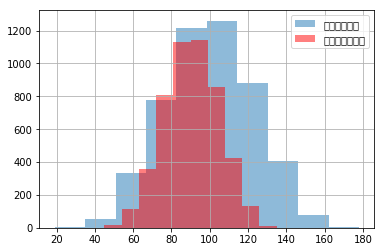

In [31]:
#1、不同用户的主叫时长分布情况对比
cond = data['是否潜在合约用户'] == 1
data[cond]['主叫时长（分）'].hist(alpha = 0.5, label = '潜在合约用户')
data[~cond]['主叫时长（分）'].hist(color = 'r', alpha = 0.5, label = '非潜在合约用户')
plt.legend()

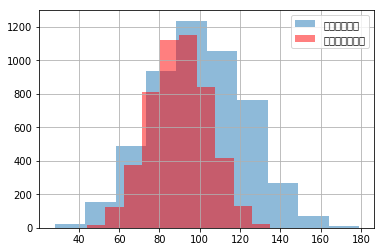

In [33]:
#2、不同用户的被叫时长分布情况对比
cond = data['是否潜在合约用户'] == 1
data[cond]['被叫时长（分）'].hist(alpha = 0.5, label = '潜在合约用户')
data[~cond]['被叫时长（分）'].hist(color = 'r', alpha = 0.5, label = '非潜在合约用户')
plt.legend()

In [34]:
#3.不同用户的业务类型情况对比
grouped = data.groupby(['是否潜在合约用户','业务类型'])['用户标识'].count().unstack()
grouped

业务类型,2G,3G,4G
是否潜在合约用户,,,
0,1630.0,1668.0,1699.0
1,NaN,2530.0,2473.0


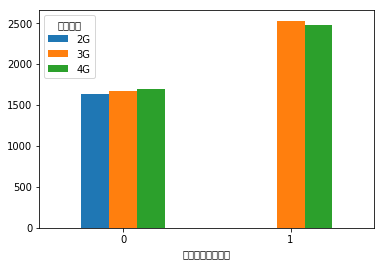

In [35]:
grouped.plot(kind = 'bar', alpha = 1 ,rot = 0)

In [36]:
#4.统计各类数据的数量
data['是否潜在合约用户'].value_counts()

1    5003
0    4997
Name: 是否潜在合约用户, dtype: int64

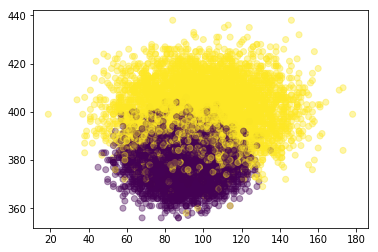

In [3]:
#不同类型的可视化
y = data.loc[:,'是否潜在合约用户']
plt.scatter(data.loc[:,'主叫时长（分）'],data.loc[:,'免费流量'], c=y,alpha=0.4)

##### 数据预处理

In [3]:
#1、分割特征数据集和便签数据集
X = data.loc[: , '业务类型':'余额']
y = data.loc[: , '是否潜在合约用户']
print('The shape of X is {}'.format(X.shape))
print('The shape of y is {}'.format(y.shape))

The shape of X is (10000, 11)
The shape of y is (10000,)


In [4]:
X.head()

,业务类型,主叫时长（分）,被叫时长（分）,免费流量,计费流量,月均上网时长（分）,入网时长（天）,最近一次缴费金额（元）,总缴费金额(元),缴费次数,余额
0,3G,70.0,97.0,395.0,13.0,64.0,168.0,59.0,465.0,7.0,36.0
1,3G,94.0,79.0,366.0,35.0,59.0,182.0,70.0,542.0,13.0,66.0
2,3G,92.0,99.0,390.0,44.0,134.0,219.0,8.0,548.0,8.0,110.0
3,4G,131.0,87.0,391.0,0.0,128.0,180.0,63.0,498.0,4.0,30.0
4,4G,74.0,104.0,397.0,35.0,112.0,258.0,68.0,614.0,15.0,18.0


In [5]:
#2、类别特征编码
#自定义转换函数
def service_mapping(cell):
    if cell == '2G':
        return 2
    elif cell == '3G':
        return 3
    elif cell == '4G':
        return 4
    
#将业务类型的string型值映射为整数型
service_map = X['业务类型'].map(service_mapping)
service = pd.DataFrame(service_map)

#使用OneHotEncoder 转化类型特征为0/1编码的多维特征
enc = OneHotEncoder()
service_enc = enc.fit_transform(service).toarray()
service_enc

#0/1编码的多维特征的名称
service_names = enc.active_features_.tolist()
service_newname = [str(x) + 'G' for x in service_names]

service_df = pd.DataFrame(service_enc,columns=service_newname)
service_df.head()
X_enc = pd.concat([X,service_df],axis = 1).drop('业务类型',axis = 1)
X_enc.head()

d:\python3.5\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
d:\python3.5\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function active_features_ is deprecated; The ``active_features_`` attribute was deprecated in version 0.20 and will be removed 0.22.
  warnings.warn(msg, category=DeprecationWarning)


,主叫时长（分）,被叫时长（分）,免费流量,计费流量,月均上网时长（分）,入网时长（天）,最近一次缴费金额（元）,总缴费金额(元),缴费次数,余额,2G,3G,4G
0,70.0,97.0,395.0,13.0,64.0,168.0,59.0,465.0,7.0,36.0,0.0,1.0,0.0
1,94.0,79.0,366.0,35.0,59.0,182.0,70.0,542.0,13.0,66.0,0.0,1.0,0.0
2,92.0,99.0,390.0,44.0,134.0,219.0,8.0,548.0,8.0,110.0,0.0,1.0,0.0
3,131.0,87.0,391.0,0.0,128.0,180.0,63.0,498.0,4.0,30.0,0.0,0.0,1.0
4,74.0,104.0,397.0,35.0,112.0,258.0,68.0,614.0,15.0,18.0,0.0,0.0,1.0


In [6]:
#3、分割数据集
#将数据集分为训练集和测试集
from sklearn import metrics
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.ensemble import GradientBoostingClassifier

#分割训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_enc,y ,test_size = 0.2,random_state=112)
print('The shape of X_train is {}'.format(X_train.shape))
print('The shape of X_test is {}'.format(X_test.shape))

The shape of X_train is (8000, 13)
The shape of X_test is (2000, 13)


In [8]:
X_train.head()

,主叫时长（分）,被叫时长（分）,免费流量,计费流量,月均上网时长（分）,入网时长（天）,最近一次缴费金额（元）,总缴费金额(元),缴费次数,余额,2G,3G,4G
6475,104.0,103.0,382.0,0.0,70.0,198.0,96.0,606.0,8.0,74.0,0.0,1.0,0.0
2220,79.0,66.0,391.0,10.0,79.0,130.0,67.0,526.0,7.0,39.0,0.0,0.0,1.0
2462,104.0,106.0,371.0,14.0,114.0,210.0,47.0,479.0,11.0,53.0,0.0,1.0,0.0
4551,91.0,77.0,376.0,36.0,92.0,161.0,78.0,605.0,11.0,70.0,1.0,0.0,0.0
6736,72.0,132.0,406.0,92.0,150.0,179.0,106.0,556.0,11.0,33.0,0.0,1.0,0.0


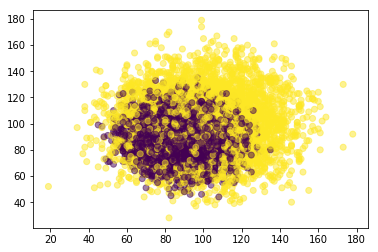

In [9]:
#生成数据可视化
plt.scatter(X_train.iloc[:,0], X_train.iloc[:,1], c=y_train,alpha=0.5)

##### 训练简单模型

In [10]:
#1、生成模型训练评估函数
def modelfit(alg, X_train, y_train, performCV = True, printFeatureImportance = True, cv_folds = 5):
    alg.fit(X_train, y_train)
    #predict training set:
    train_predictions = alg.predict(X_train)
    train_predprob = alg.predict_proba(X_train)[:,1] 
    #preform cross-validation:here the author calculate cross-validated AUC
    if performCV:
        cv_score = cross_val_score(alg, X_train, y_train, cv = cv_folds, scoring = 'roc_auc')
    #print model report:
    print("\n Model Report")
    print("Accuracy (Train):%3.4f" % metrics.accuracy_score(y_train.values,train_predictions))
    #IMPORTANT:first argument is true values ,second argument is predicted probabilities.
    print("AUC Score (Train): %f" % metrics.roc_auc_score(y_train, train_predprob))
    
    if performCV:
        print("CV Score :Mean - %.7g | Std - %.7g| Min - %.7g| Max - %.7g"\
             % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
        
    #print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, X_train.columns.tolist()).sort_values(ascending=True)
        feat_imp.plot(kind = 'barh',title = "Feature Importances")
        plt.ylabel("Feature Importance Score")
        _=plt.xlabel("Relative Importance")

In [11]:
#2、训练简单模型作为baseline model
clf0 = GradientBoostingClassifier(random_state=110)
#在训练集上训练模型
clf0.fit(X_train, y_train)

#在测试集上预测
y_pred = clf0.predict(X_test)

#计算准备率
score = metrics.accuracy_score(y_test, y_pred)
print("The accuracy score of the model is:{}".format(score))

#查看混淆矩阵
metrics.confusion_matrix(y_test, y_pred)

The accuracy score of the model is:0.9825


array([[1028,   10],
       [  25,  937]], dtype=int64)


 Model Report
Accuracy (Train):0.9862
AUC Score (Train): 0.999099
CV Score :Mean - 0.9975603 | Std - 0.0004027038| Min - 0.9969856| Max - 0.9979951


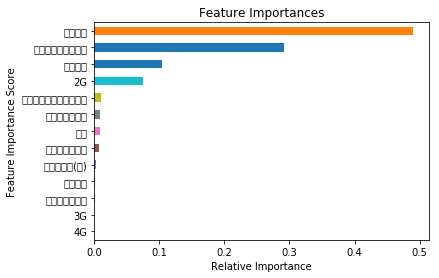

In [12]:
#3.简单模型评估
#模型实例化
clf0 = GradientBoostingClassifier(random_state=110)
modelfit(clf0 , X_train, y_train)

#### GBDT调参

In [83]:
#1、调试迭代次数:n_estimators
#设置迭代次数的范围
param_test1 = {'n_estimators':range(20,81,10)}
estimator = GradientBoostingClassifier(learning_rate=0.2,min_samples_split=50,min_samples_leaf=5,
                                      max_depth = 8,max_features = 'sqrt',
                                      subsample=0.8,random_state=10)
gsearch1 = GridSearchCV(estimator, param_grid=param_test1, scoring='roc_auc', n_jobs=4, iid=False, cv=5)
gsearch1.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.2, loss='deviance', max_depth=8,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=5, min_sam...      subsample=0.8, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid=False, n_jobs=4,
       param_grid={'n_estimators': range(20, 81, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [84]:
#估计最好的模型，打印分数
print(gsearch1.best_score_)
print(gsearch1.best_params_)
print(gsearch1.best_estimator_)

0.9980319708107752
{'n_estimators': 80}
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.2, loss='deviance', max_depth=8,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=5, min_samples_split=50,
              min_weight_fraction_leaf=0.0, n_estimators=80,
              n_iter_no_change=None, presort='auto', random_state=10,
              subsample=0.8, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)


In [89]:
#2、调试决策树的相关参数：max_features 和 min_samples_spilt
#固定参数learning_rate=0.2,n_estimators=80,调试max_features 和 min_samples_spilt
param_test2 = {'max_depth':range(1,9,1), 'min_samples_split':range(10,101,10)}
estimator = GradientBoostingClassifier(learning_rate=0.2, n_estimators=80, max_features='sqrt',
                                       subsample=0.8,random_state=10)
gsearch2 = GridSearchCV(estimator, param_grid=param_test2, scoring='roc_auc',n_jobs=4,iid=False,cv=5)
gsearch2.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.2, loss='deviance', max_depth=3,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sam...      subsample=0.8, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid=False, n_jobs=4,
       param_grid={'max_depth': range(1, 9), 'min_samples_split': range(10, 101, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [90]:
#估计最好的模型，打印分数
print(gsearch2.best_score_)
print(gsearch2.best_params_)
print(gsearch2.best_estimator_)

0.9983572549633216
{'max_depth': 4, 'min_samples_split': 80}
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.2, loss='deviance', max_depth=4,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=80,
              min_weight_fraction_leaf=0.0, n_estimators=80,
              n_iter_no_change=None, presort='auto', random_state=10,
              subsample=0.8, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)


In [92]:
#3、调试决策树的相关参数：min_samples_spile 和 min_samples_leaf
#固定参数learning_rate=0.2,n_estimators=80,max_depth=4 调试min_samples_split和 min_samples_leaf
param_test3 = {'min_samples_split':range(90,201,20), 'min_samples_leaf':range(5,51,5)}
eastimator = GradientBoostingClassifier(learning_rate=0.2, n_estimators=80, max_depth=4,
                                       max_features='sqrt',subsample=0.8,random_state=10)
gsearch3 = GridSearchCV(estimator, param_grid = param_test3,scoring = 'roc_auc',n_jobs=4,iid=False,cv=5)
gsearch3.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.2, loss='deviance', max_depth=3,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sam...      subsample=0.8, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid=False, n_jobs=4,
       param_grid={'min_samples_split': range(90, 201, 20), 'min_samples_leaf': range(5, 51, 5)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [93]:
#估计最好的模型，打印分数
print(gsearch3.best_score_)
print(gsearch3.best_params_)
print(gsearch3.best_estimator_)

0.9984128626452178
{'min_samples_split': 190, 'min_samples_leaf': 15}
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.2, loss='deviance', max_depth=3,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=15, min_samples_split=190,
              min_weight_fraction_leaf=0.0, n_estimators=80,
              n_iter_no_change=None, presort='auto', random_state=10,
              subsample=0.8, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)


In [95]:
#4、调试决策树的相关参数：max_features
#固定参数learning_rate=0.2,n_estimators=80,max_depth=4 ，min_samples_split=190， min_samples_leaf=15，调试max_features
param_test4 = {'max_features':range(1,8,1)}
eastimator = GradientBoostingClassifier(learning_rate=0.2, n_estimators=80, max_depth=4,
                                       min_samples_split=190,min_samples_leaf=15,
                                     subsample=0.8,random_state=10)
gsearch4 = GridSearchCV(estimator, param_grid = param_test4,scoring = 'roc_auc',n_jobs=4,iid=False,cv=5)
gsearch4.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.2, loss='deviance', max_depth=3,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sam...      subsample=0.8, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid=False, n_jobs=4,
       param_grid={'max_features': range(1, 8)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='roc_auc', verbose=0)

In [96]:
#估计最好的模型，打印分数
print(gsearch4.best_score_)
print(gsearch4.best_params_)
print(gsearch4.best_estimator_)

0.9982981574576035
{'max_features': 3}
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.2, loss='deviance', max_depth=3,
              max_features=3, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=80,
              n_iter_no_change=None, presort='auto', random_state=10,
              subsample=0.8, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)


In [97]:
#5、调试决策树的相关参数：subsample
#固定参数learning_rate=0.2,n_estimators=80,max_depth=4 ，min_samples_split=190， min_samples_leaf=15 ,max_features = 3
#调试subsample 和lower learing rate
param_test5 = {'subsample':[0.6,0.7,0.75,0.8,0.85,0.9]}
eastimator = GradientBoostingClassifier(learning_rate=0.2, n_estimators=80, max_depth=4,
                                       min_samples_split=190,min_samples_leaf=15,
                                     max_features=3,random_state=10)
gsearch5 = GridSearchCV(estimator, param_grid = param_test5,scoring = 'roc_auc',n_jobs=4,iid=False,cv=5)
gsearch5.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.2, loss='deviance', max_depth=3,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sam...      subsample=0.8, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid=False, n_jobs=4,
       param_grid={'subsample': [0.6, 0.7, 0.75, 0.8, 0.85, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [98]:
#估计最好的模型，打印分数
print(gsearch5.best_score_)
print(gsearch5.best_params_)
print(gsearch5.best_estimator_)

0.998338519778439
{'subsample': 0.9}
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.2, loss='deviance', max_depth=3,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=80,
              n_iter_no_change=None, presort='auto', random_state=10,
              subsample=0.9, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)



 Model Report
Accuracy (Train):0.9909
AUC Score (Train): 0.999384
CV Score :Mean - 0.9981554 | Std - 0.0003367588| Min - 0.9975404| Max - 0.9984795


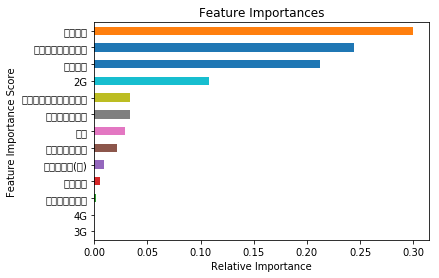

In [99]:
#6、调试learning_rate 和 n_estimator
#减少learning rate ,成比例的增加n_estimator
#当learning_rate =0.1,n_estimators=140
gbm_tuned_1 = GradientBoostingClassifier(learning_rate=0.1,n_estimators=140,max_depth=3,
                                        min_samples_leaf=15, min_samples_split=190,
                                        max_features=3,subsample=0.9,random_state=10)
modelfit(gbm_tuned_1,X_train, y_train)


 Model Report
Accuracy (Train):0.9870
AUC Score (Train): 0.999052
CV Score :Mean - 0.9979178 | Std - 0.0003648853| Min - 0.9973404| Max - 0.9982592


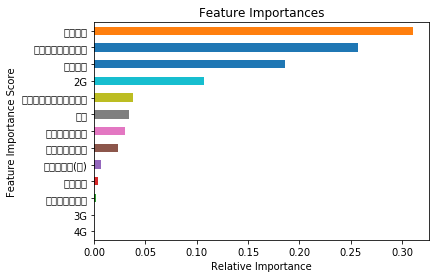

In [100]:
#当learning_rate =0.05,n_estimators=210
gbm_tuned_2 = GradientBoostingClassifier(learning_rate=0.05,n_estimators=210,max_depth=3,
                                        min_samples_leaf=15, min_samples_split=190,
                                        max_features=3,subsample=0.9,random_state=10)
modelfit(gbm_tuned_2,X_train, y_train)


 Model Report
Accuracy (Train):0.9912
AUC Score (Train): 0.999440
CV Score :Mean - 0.998296 | Std - 0.0003048977| Min - 0.9978638| Max - 0.9986624


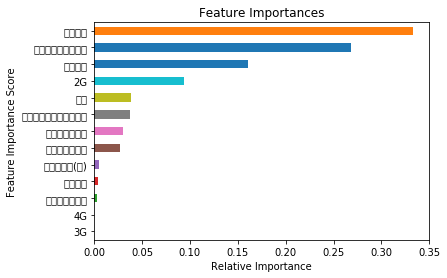

In [101]:
#当learning_rate =0.01,n_estimators=1400
gbm_tuned_3 = GradientBoostingClassifier(learning_rate=0.01,n_estimators=1400,max_depth=3,
                                        min_samples_leaf=15, min_samples_split=190,
                                        max_features=3,subsample=0.9,random_state=10)
modelfit(gbm_tuned_3,X_train, y_train)

In [102]:
#7.训练使用最优超参的模型
gbm_tuned_3 = GradientBoostingClassifier(learning_rate=0.01,n_estimators=1400,max_depth=3,
                                        min_samples_leaf=15, min_samples_split=190,
                                        max_features=3,subsample=0.9,random_state=10)
#在训练集上训练模型
gbm_tuned_3.fit(X_train, y_train)

#在测试集上预测
y_pred = gbm_tuned_3.predict(X_test)
y_pred_proba = gbm_tuned_3.predict_proba(X_test)[:,1]


#### GBDT使用网格搜索调参

In [ ]:
params = {'min_samples_split':range(10,101,10),'n_estimators':range(20,81,10),
          'subsample':[0.6,0.7,0.75,0.8,0.85,0.9],'max_features':range(1,8,1), 'min_samples_leaf':range(5,51,5)}
gbm_tuned = GradientBoostingClassifier()
clf = GridSearchCV(gbm_tuned, params, cv=5)
clf.fit(X_train, y_train)

### 模型评估

In [105]:
#计算准确率
score = metrics.accuracy_score(y_test,y_pred)
print("The accuracy score of the model for test data is:{}".format(score) )

auc_score = metrics.roc_auc_score(y_test,y_pred_proba)
print("The accuracy score of the model for test data is:{}".format(auc_score) )

The accuracy score of the model for test data is:0.987
The accuracy score of the model for test data is:0.9976996783355165


In [106]:
#查看混淆矩阵
metrics.confusion_matrix(y_test, y_pred)

array([[1034,    4],
       [  22,  940]], dtype=int64)

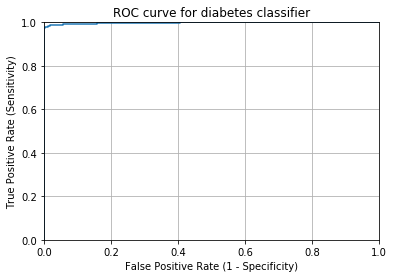

In [108]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

### XGboost模型

In [7]:
from xgboost import XGBClassifier
gbm_tuned_4 = XGBClassifier(n_estimators=100,subsample=0.8,learning_rate=0.3,gamma=0,
                            max_depth=6,colsample_btree=0.8, alpha=0.9,reg_lambda=0.8)

#在训练集上训练模型
gbm_tuned_4.fit(X_train, y_train)

#在测试集上预测
y_pred = gbm_tuned_4.predict(X_test)
y_pred_proba = gbm_tuned_4.predict_proba(X_test)[:,1]

#计算准确率
score = metrics.accuracy_score(y_test,y_pred)
print("The accuracy score of the model for test data is:{}".format(score) )

auc_score = metrics.roc_auc_score(y_test,y_pred_proba)
print("The accuracy score of the model for test data is:{}".format(auc_score) )

The accuracy score of the model for test data is:0.99
The accuracy score of the model for test data is:0.9975084021326797


#### 网格搜索

In [27]:
params2 = {'n_estimators':range(80,500,100)}
gbm_tuned_5 = XGBClassifier(subsample=0.8,learning_rate=0.3,gamma=0,max_depth=6,colsample_btree=0.8, alpha=0.9,reg_lambda=0.9)

clf2 = GridSearchCV(gbm_tuned_5,params2,n_jobs=-1,cv=5)
clf2.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBClassifier(alpha=0.9, base_score=0.5, booster='gbtree',
       colsample_btree=0.8, colsample_bylevel=1, colsample_bynode=1,
       colsample_bytree=1, gamma=0, learning_rate=0.3, max_delta_step=0,
       max_depth=6, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=0.9, scale_pos_weight=1, seed=None,
       silent=None, subsample=0.8, verbosity=1),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': range(80, 500, 100)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [28]:
print(clf2.best_score_ , clf2.best_params_)

0.983875 {'n_estimators': 80}


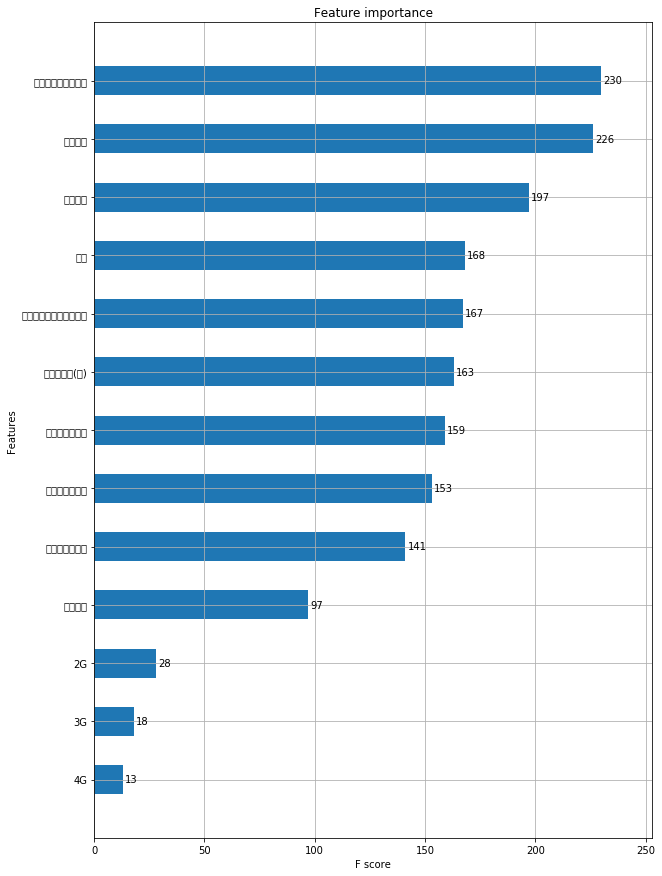

In [40]:
from xgboost import plot_importance
fig,ax = plt.subplots(figsize=(10,15))
plot_importance(gbm_tuned_4,height=0.5,max_num_features=64,ax=ax)
plt.show()